In [131]:
!pip install soundfile

In [132]:
import os
import numpy as np
import pandas as pd
import soundfile as sf
import scipy.signal as signal
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from keras.optimizers import Adam
#from keras.models import Sequential
#from keras.layers import Dense, Activation, Bidirectional,Attention

In [133]:
train_path = '../input/train/train/'
test_path = '../input/test/test/'

In [134]:
filename = 'de_f_0809fd0642232f8c85b0b3d545dc2b5a.fragment1.flac'

In [135]:
data, samplerate = sf.read(train_path+filename)

In [136]:
data

array([-0.03903198, -0.03997803, -0.05319214, ..., -0.00836182,
        0.01141357,  0.01940918])

Text(0.5, 0, 'Time [sec]')

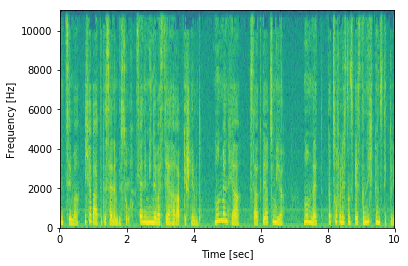

In [137]:
Pxx, freqs, bins, im = plt.specgram(data, Fs=samplerate)

# add axis labels
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

In [138]:
data

array([-0.03903198, -0.03997803, -0.05319214, ..., -0.00836182,
        0.01141357,  0.01940918])

Text(0.5, 0, 'Time ')

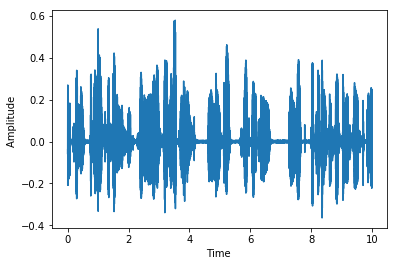

In [139]:
Time= np.linspace(0, len( data )/samplerate, num=len(data))
plt.plot(Time, data )
plt.ylabel('Amplitude ')
plt.xlabel('Time ')

In [140]:
label = []
for filename in os.listdir(train_path)[:500]:
    label.append(filename[:2])

In [141]:
gender = []
for filename in os.listdir(train_path)[:500]:
    gender.append('male' if filename[3:4]=='m' else 'female')

In [142]:
sound_type = []
for filename in os.listdir(train_path)[:500]:
    sound_type.append('noise' if 'noise' in filename else 'pitch' if 'pitch' in filename else 'speed' if 'speed' in filename else 'notype')

In [143]:
file = []
for filename in os.listdir(train_path)[:500]:
    file.append(filename)

In [144]:
series = []
length = []
for filename in os.listdir(train_path)[:500]:
    flac, samplerate = sf.read(train_path+filename)
    series.append(flac)
    length.append(samplerate)

In [145]:
data = {'Gender':gender,
        'filename':file,
           'Sound_type': sound_type,
       'language':label,
       'series': series,
       'length': length }

In [146]:
df = pd.DataFrame( data )

In [147]:
df

,Gender,filename,Sound_type,language,series,length
0,male,de_m_8ea3514af1c01478fbcd004b026fea71.fragment...,pitch,de,"[-0.017547607421875, -0.0240478515625, -0.0216...",22050
1,female,en_f_c8835fb3edef243176e1e9beef1f9681.fragment...,speed,en,"[-0.0604248046875, -0.09576416015625, -0.08053...",22050
2,female,en_f_fff98d05640df27726dcd6183642ffaa.fragment...,noise,en,"[-0.0028076171875, -0.00640869140625, -0.00573...",22050
3,male,en_m_597da7d934dbb4df3da45acf11536350.fragment...,speed,en,"[-0.08660888671875, -0.129638671875, -0.095642...",22050
4,male,es_m_b53274d3ef7996a22d6ec929c1869804.fragment...,speed,es,"[0.0, 0.0, 3.0517578125e-05, 3.0517578125e-05,...",22050
5,female,en_f_386ee651f6f1539ff5622c55e234e5a4.fragment...,speed,en,"[-6.103515625e-05, -3.0517578125e-05, -3.05175...",22050
6,male,es_m_b8e0e6f56f02e6f8f79cc360958e5982.fragment...,noise,es,"[-0.00726318359375, -0.013214111328125, -0.014...",22050
7,male,es_m_d7128fe46e362acdb2271a154e3206ae.fragment...,noise,es,"[0.00042724609375, -0.0108642578125, -0.012359...",22050
8,male,es_m_b53274d3ef7996a22d6ec929c1869804.fragment...,speed,es,"[-0.054962158203125, -0.078155517578125, -0.05...",22050
9,female,en_f_386ee651f6f1539ff5622c55e234e5a4.fragment...,noise,en,"[-0.00274658203125, -0.00628662109375, -0.0054...",22050


In [148]:
len(df)

500

In [149]:
df_male_en = df[(df['Gender']=='male') & (df['language']=='en')].reset_index(drop=True)
df_male_es = df[(df['Gender']=='male') & (df['language']=='es')].reset_index(drop=True)
df_male_de = df[(df['Gender']=='male') & (df['language']=='de')].reset_index(drop=True)
df_female_en = df[(df['Gender']=='female') & (df['language']=='en')].reset_index(drop=True)
df_female_es = df[(df['Gender']=='female') & (df['language']=='es')].reset_index(drop=True)
df_female_de = df[(df['Gender']=='female') & (df['language']=='de')].reset_index(drop=True)

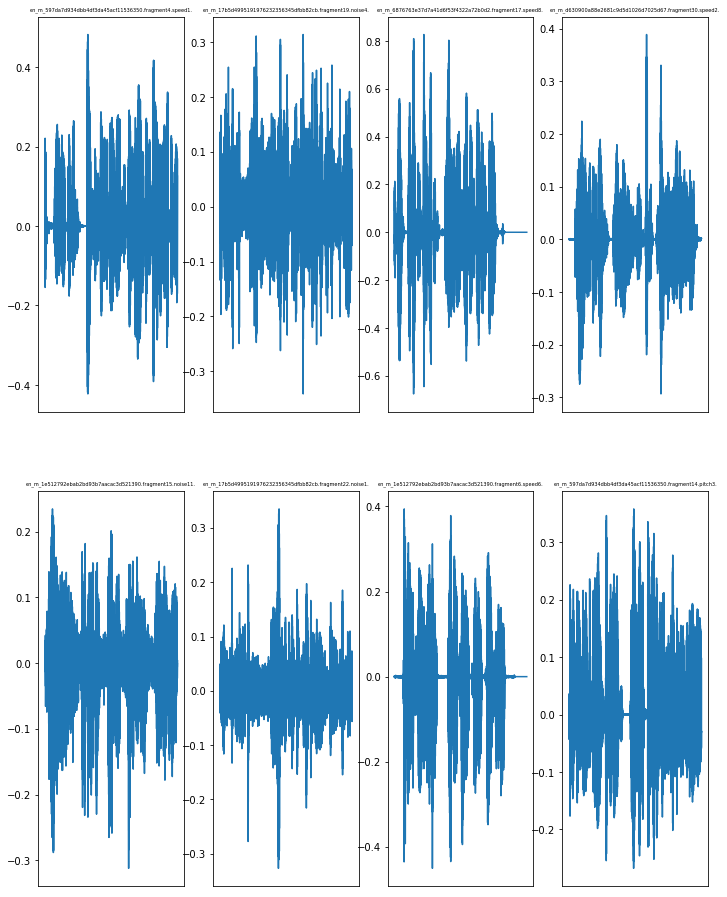

In [150]:
fig, ax = plt.subplots(2, 4, figsize = (12, 16))
for i in range(8):
    ax[i//4, i%4].plot(df_male_en['series'][i])
    ax[i//4, i%4].set_title(df_male_en['filename'][i][:-4], fontsize=5)
    ax[i//4, i%4].get_xaxis().set_ticks([])

The first 8 male with espanol language waveform

In [151]:
data = {'Gender':gender,
       'language':label,
       'series': series,
       }

In [152]:
df = pd.DataFrame( data )
df

,Gender,language,series
0,male,de,"[-0.017547607421875, -0.0240478515625, -0.0216..."
1,female,en,"[-0.0604248046875, -0.09576416015625, -0.08053..."
2,female,en,"[-0.0028076171875, -0.00640869140625, -0.00573..."
3,male,en,"[-0.08660888671875, -0.129638671875, -0.095642..."
4,male,es,"[0.0, 0.0, 3.0517578125e-05, 3.0517578125e-05,..."
5,female,en,"[-6.103515625e-05, -3.0517578125e-05, -3.05175..."
6,male,es,"[-0.00726318359375, -0.013214111328125, -0.014..."
7,male,es,"[0.00042724609375, -0.0108642578125, -0.012359..."
8,male,es,"[-0.054962158203125, -0.078155517578125, -0.05..."
9,female,en,"[-0.00274658203125, -0.00628662109375, -0.0054..."


In [153]:
df.columns

Index(['Gender', 'language', 'series'], dtype='object')

In [154]:
df.dtypes

Gender      object
language    object
series      object
dtype: object

In [155]:
df.language.replace({'en':1,'es':2,'de':3},inplace=True)

df.language.unique()


array([3, 1, 2])

In [156]:
df.Gender.replace({'female':0,'male':1},inplace=True)
df.Gender.unique()

array([1, 0])

In [157]:
df

,Gender,language,series
0,1,3,"[-0.017547607421875, -0.0240478515625, -0.0216..."
1,0,1,"[-0.0604248046875, -0.09576416015625, -0.08053..."
2,0,1,"[-0.0028076171875, -0.00640869140625, -0.00573..."
3,1,1,"[-0.08660888671875, -0.129638671875, -0.095642..."
4,1,2,"[0.0, 0.0, 3.0517578125e-05, 3.0517578125e-05,..."
5,0,1,"[-6.103515625e-05, -3.0517578125e-05, -3.05175..."
6,1,2,"[-0.00726318359375, -0.013214111328125, -0.014..."
7,1,2,"[0.00042724609375, -0.0108642578125, -0.012359..."
8,1,2,"[-0.054962158203125, -0.078155517578125, -0.05..."
9,0,1,"[-0.00274658203125, -0.00628662109375, -0.0054..."


In [158]:
print(df.shape)

(500, 3)


In [159]:
def format_to_lstm(df):
    X=np.array(df)
    return np.reshape(X,(X.shape[0],1,X.shape[1]))

In [160]:
#format_to_lstm(df)
#print(df.shape)

In [161]:
y=df.language
print(y.shape)
#print(y)

(500,)


In [162]:
import numpy as np
import os
from sklearn.model_selection import train_test_split

files=format_to_lstm(df)
#files = np.array(df)
y = np.array(y)
paths_train, paths_valid, y_train, y_valid = train_test_split(files, y, test_size = 0.2, random_state=45)
print(paths_train.shape, y_train.shape, paths_valid.shape, y_valid.shape)


(400, 1, 3) (400,) (100, 1, 3) (100,)


In [175]:
print(y_valid)

[[[1. 0.]
  [0. 1.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [0. 1.]
  [1. 0.]]

 [[1. 0.]
  [0. 1.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [0. 1.]
  [1. 0.]]

 [[1. 0.]
  [0. 1.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [0. 1.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [0. 1.]
  [1. 0.]]

 [[1. 0.]
  [0. 1.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [0. 1.]
  [1. 0.]]

 [[1. 0.]
  [0. 1.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [0. 1.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [0. 1.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [0. 1.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [0. 1.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [0. 1.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [0. 1.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [0. 1.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [1. 0.]
  [0. 1.]]

 [[1. 0.]
  [1. 0.]
  [1. 0.]
  [0. 1.]]

 [[1. 0.]
  [1. 0.]
  [0. 1.]
  [1

In [163]:
from keras.layers import Embedding,ELU,CuDNNLSTM, Flatten, Input, Dense, CuDNNGRU,concatenate, Bidirectional, SpatialDropout1D, Conv1D, GlobalAveragePooling1D, GlobalMaxPooling1D, Dropout
from keras.models import Model,Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [164]:
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints, optimizers, layers

class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3
        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None
    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

In [185]:
# Neural network model
input_shape = (636,128)
optimizer = Adam(0.005, beta_1=0.1, beta_2=0.001, amsgrad=True)
n_classes = 3

model = Sequential()
model.add(Bidirectional(CuDNNLSTM(256, return_sequences=True), input_shape=paths_train.shape[1:]))
model.add(Attention(636))
model.add(Dropout(0.2))

model.add(Dense(400))
model.add(ELU())
model.add(Dropout(0.2)) 

model.add(Dense(n_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])


In [166]:
print(n_classes)

3


In [181]:
#y=np.array(y_valid)
#y_valid=y.reshape(1,1,-1)
#print(y)
print(y_valid)

[[[[0. 1.]
   [1. 0.]]

  [[1. 0.]
   [0. 1.]]

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]]


 [[[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  [[1. 0.]
   [0. 1.]]

  [[0. 1.]
   [1. 0.]]]


 [[[0. 1.]
   [1. 0.]]

  [[1. 0.]
   [0. 1.]]

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]]


 ...


 [[[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  [[1. 0.]
   [0. 1.]]]


 [[[0. 1.]
   [1. 0.]]

  [[1. 0.]
   [0. 1.]]

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]]


 [[[0. 1.]
   [1. 0.]]

  [[1. 0.]
   [0. 1.]]

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]]]


In [192]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)


In [169]:
#paths_train = np.reshape(paths_train, (paths_train.shape[0],1, paths_train.shape[1]))
#paths_valid = np.reshape(paths_test, (paths_test.shape[0],1, paths_test.shape[1]))

In [194]:
# Train model
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=10)
hist = model.fit(np.array(paths_train),
          y_train,
          batch_size=100,
          epochs=500,
          validation_data=(np.array(paths_valid), y_valid),
          callbacks = [es])

ValueError: Error when checking target: expected dense_30 to have 2 dimensions, but got array with shape (400, 4, 2, 2, 2)